In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

ValueError: Invalid image type. Expected either PIL.Image.Image, numpy.ndarray, torch.Tensor, tf.Tensor or jax.ndarray, but got <class 'str'>.

In [ ]:
from PIL import Image
img = Image.open("/content/ocr_TEST.png").convert("RGB")
img

from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
# calling the processor is equivalent to calling the feature extractor
pixel_values = processor(img, return_tensors="pt").pixel_values
print(pixel_values.shape)
pixel_values = processor(images=img, return_tensors="pt").pixel_values

from transformers import VisionEncoderDecoderModel

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print(generated_text)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


torch.Size([1, 3, 384, 384])


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


industry, " Mr. Brown commented icily. " Let us have a


In [ ]:
API_KEY = "d82919c6-e80b-11ee-8528-9a63acd1e5a6"
# https://github.com/NanoNets/ocr-python?tab=readme-ov-file
# https://github.com/NanoNets/ocr-python/blob/main/tests/alltests.ipynb

In [ ]:
!pip install ocr-nanonets-wrapper

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ocr-nanonets-wrapper: filename=ocr_nanonets_wrapper-1.1-py3-none-any.whl size=4703 sha256=bf7510e72a4cfcb822b07d0d380a433d3c2d7a5a8e84c2670fffebdaf012efb5
  Stored in directory: /root/.cache/pip/wheels/79/0a/3a/943b1a7a11b4a43520e5cc2e56e4e95702d8c865c1f4befc6f
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40702 sha256=5843423ca2dbbb160ea122ee75e6730bd41cdf423cf286c090178c4a1b87b011
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built ocr-nanonets-wrapper fpdf


In [ ]:
from nanonets import NANONETSOCR
model = NANONETSOCR()


In [ ]:
model.set_token(API_KEY)

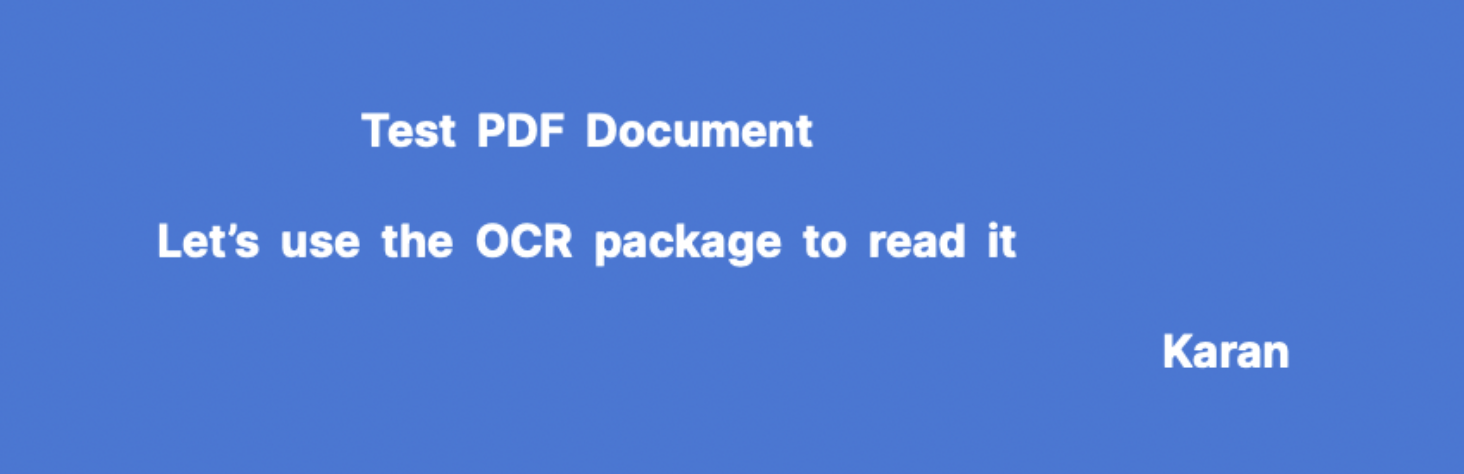

In [ ]:
from PIL import Image
img=Image.open('/content/ocrtestd.png')
img

In [ ]:
string1 = model.convert_to_string(img)

print(string1)

TypeError: argument of type 'PngImageFile' is not iterable

In [ ]:
import pickle

In [ ]:
!pip install pdf2jpg
from pdf2jpg import pdf2jpg
inputpath = r"/content/ocrtestd.pdf"
outputpath = r"/content/sample_data"
result = pdf2jpg.convert_pdf2jpg(inputpath,outputpath, pages="ALL")

In [ ]:
string1 = model.convert_to_string('/content/sample_data/ocrtestd.pdf_dir/0_ocrtestd.pdf.jpg')

print(string1)

PAGE 1

            Test PDF Document
Let's use the OCR package to read it
                                                         Karan


